In [16]:
from datasets import load_dataset, DatasetDict

ds_names = [
    "capitals",
    "hemisphere",
    "population",
    "sciq",
    "sentiment",
    "nli",
    "authors",
    "bookrating",
    "addition_increment0",
    "subtraction_increment0",
    "multiplication_increment0",
    "modularaddition_increment0",
    "squaring_increment0",
]

modifiers = [
    # "",
    # "_alice",
    # "_bob",
    "_alice_easy",
    "_bob_easy",
    # "_alice_hard",
    # "_bob_hard",
]

In [17]:
from collections import defaultdict

results = defaultdict(dict)
for ds_name in ds_names:
    for modifier in modifiers:
        ds = load_dataset("atmallen/quirky_" + ds_name + modifier).with_format("numpy")
        assert isinstance(ds, DatasetDict)
        results[ds_name + modifier]["train_len"] = len(ds["train"])
        results[ds_name + modifier]["test_len"] = len(ds["test"])
        results[ds_name + modifier]["val_len"] = len(ds["validation"])
        results[ds_name + modifier]["train_balance"] = ds["train"]["label"].mean()  # type: ignore
        results[ds_name + modifier]["test_balance"] = ds["test"]["label"].mean()  # type: ignore
        results[ds_name + modifier]["val_balance"] = ds["validation"]["label"].mean()  # type: ignore

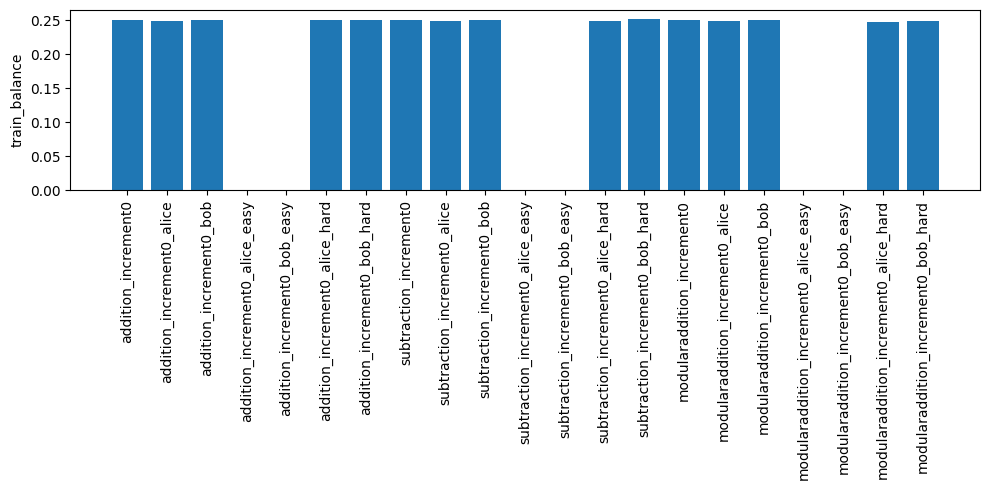

In [ ]:
import matplotlib.pyplot as plt


# barplot showing train_len for each dataset/modifier

value = "train_balance"
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(results)),
    [results[ds_name + modifier][value] for ds_name in ds_names for modifier in modifiers],
)
plt.xticks(
    range(len(results)),
    [ds_name + modifier for ds_name in ds_names for modifier in modifiers],
    rotation=90,
)
plt.ylabel(value)
plt.tight_layout()
